In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import SGD
from pathlib import Path

In [2]:
# Read the data
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
test_original = test.copy()

# Exploring the data


From a first look at the data we can see that there are different types of variables, which include categorical and numerical variables. That means we will have to preprocess the data before we can use it to train the model.

In [3]:
# Check the data
train.head()

,id,FRAUDE,VALOR,HORA_AUX,Dist_max_NAL,Canal1,FECHA,COD_PAIS,CANAL,DIASEM,...,INGRESOS,EGRESOS,NROPAISES,Dist_Sum_INTER,Dist_Mean_INTER,Dist_Max_INTER,NROCIUDADES,Dist_Mean_NAL,Dist_HOY,Dist_sum_NAL
0,9000000001,1,0.0,13,659.13,ATM_INT,20150501,US,ATM_INT,5,...,1200000.0,1200000.0,1,NaN,NaN,NaN,6,474.94,4552.41,5224.36
1,9000000002,1,0.0,17,594.77,ATM_INT,20150515,US,ATM_INT,5,...,5643700.0,500000.0,1,NaN,NaN,NaN,5,289.99,4552.41,2029.90
2,9000000003,1,0.0,13,659.13,ATM_INT,20150501,US,ATM_INT,5,...,1200000.0,1200000.0,1,NaN,NaN,NaN,6,474.94,4552.41,5224.36
3,9000000004,1,0.0,13,659.13,ATM_INT,20150501,US,ATM_INT,5,...,1200000.0,1200000.0,1,NaN,NaN,NaN,6,474.94,4552.41,5224.36
4,9000000005,1,0.0,0,1.00,ATM_INT,20150510,CR,ATM_INT,0,...,0.0,0.0,1,NaN,NaN,NaN,1,NaN,1482.35,1.00


# Check for any null values present

Also, we can see that there are missing values in the data. We will have to deal with them before training the model.

In [4]:
train.isnull().sum()

id                    0
FRAUDE                0
VALOR                 0
HORA_AUX              0
Dist_max_NAL          0
Canal1                0
FECHA                 0
COD_PAIS              0
CANAL                 0
DIASEM                0
DIAMES                0
FECHA_VIN            24
OFICINA_VIN          24
SEXO                 55
SEGMENTO             24
EDAD                 24
INGRESOS             24
EGRESOS              24
NROPAISES             0
Dist_Sum_INTER     1547
Dist_Mean_INTER    1547
Dist_Max_INTER     1547
NROCIUDADES           0
Dist_Mean_NAL       457
Dist_HOY              0
Dist_sum_NAL          0
dtype: int64

Now, in order to get a better understanding of the data, we can plot the distribution of the data.

In [5]:
train.describe()

,id,FRAUDE,VALOR,HORA_AUX,Dist_max_NAL,FECHA,DIASEM,DIAMES,FECHA_VIN,OFICINA_VIN,...,INGRESOS,EGRESOS,NROPAISES,Dist_Sum_INTER,Dist_Mean_INTER,Dist_Max_INTER,NROCIUDADES,Dist_Mean_NAL,Dist_HOY,Dist_sum_NAL
count,2.965000e+03,2965.000000,2.965000e+03,2965.000000,2965.000000,2.965000e+03,2965.000000,2965.000000,2.941000e+03,2941.000000,...,2.941000e+03,2.941000e+03,2965.000000,1418.000000,1418.000000,1418.000000,2965.000000,2508.000000,2965.000000,2965.000000
mean,6.890938e+09,0.246543,5.035695e+05,14.960877,314.656739,2.015051e+07,3.143002,13.492411,2.000920e+07,416.426386,...,1.449104e+07,8.506309e+06,1.765936,17354.692891,4144.323540,4985.442313,3.943676,196.589282,4379.826287,1765.212887
std,9.739700e+09,0.431071,9.859497e+05,6.348607,295.142673,9.134641e+00,2.092284,9.134641,9.260427e+04,290.263484,...,5.637311e+07,6.179161e+07,1.042219,25168.020649,1794.829357,2655.081718,2.750021,192.026206,1779.739070,2398.666844
min,2.364560e+06,0.000000,0.000000e+00,0.000000,1.000000,2.015050e+07,0.000000,1.000000,1.911111e+07,1.000000,...,0.000000e+00,0.000000e+00,1.000000,904.810000,904.810000,904.810000,1.000000,4.480000,0.000000,1.000000
25%,2.552997e+09,0.000000,9.016001e+04,12.000000,24.830000,2.015050e+07,1.000000,4.000000,1.995102e+07,168.000000,...,2.500000e+06,5.000000e+05,1.000000,6474.200000,3178.210000,4552.410000,2.000000,60.800000,4552.410000,139.870000
50%,6.142884e+09,0.000000,2.435912e+05,16.000000,243.620000,2.015052e+07,3.000000,15.000000,2.001123e+07,360.000000,...,5.800000e+06,1.800000e+06,1.000000,9104.820000,4552.410000,4552.410000,3.000000,127.700000,4552.410000,836.080000
75%,9.000000e+09,0.000000,5.058190e+05,20.000000,594.770000,2.015052e+07,5.000000,21.000000,2.008081e+07,659.000000,...,1.274000e+07,4.500000e+06,2.000000,21376.445000,4552.410000,4552.410000,5.000000,269.082500,4552.410000,2533.440000
max,9.330050e+10,1.000000,2.001406e+07,23.000000,1310.460000,2.015053e+07,6.000000,31.000000,2.015043e+07,967.000000,...,1.940070e+09,1.600000e+09,9.000000,758837.940000,16328.810000,17780.330000,20.000000,1217.570000,21991.200000,18832.060000


# Ploting the Fraud column
Upon plotting the data, we can see that the data is imbalanced, which means that there are more values of one class than the other.

Text(0.5, 1.0, 'Distribución de datos')

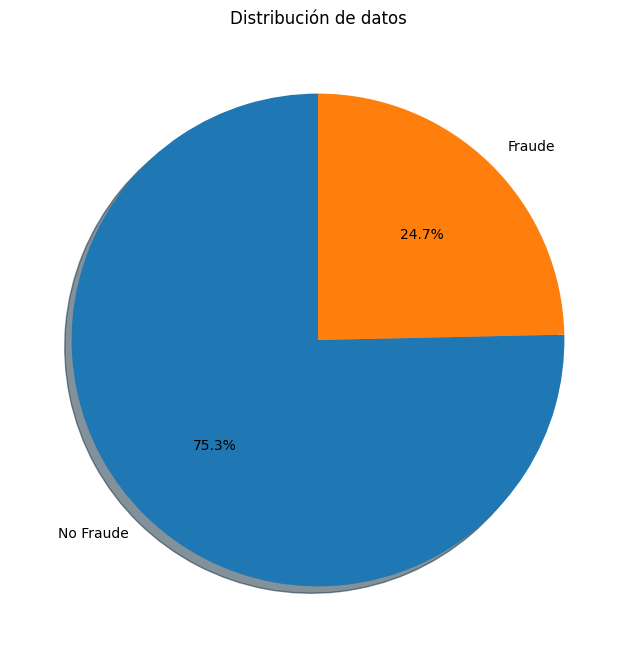

In [6]:
values = train['FRAUDE'].value_counts()
values = np.array(values)
fig, ax = plt.subplots(1,1, figsize=(8,8))
plt.pie(values, labels=['No Fraude', 'Fraude'], autopct='%1.1f%%', shadow=True, startangle=90)
plt.title('Distribución de datos')

# Data preprocessing

We will have to preprocess the data before we can use it to train the model. The preprocessing steps include:
1. Drop the columns that are not needed for the model, such as id, FECHA, FECHA_VIN, OFICINA_VIN, and the columns related to distance.
2. Normalize the numerical variables using the standard scaler by removing the mean and scaling to unit variance.
3. Drop the rows that have missing values in the column SEGMENTO.

In [7]:
train = train.drop(['id','Dist_max_NAL','Dist_Sum_INTER','Dist_Mean_INTER','Dist_Max_INTER','Dist_Mean_NAL','Dist_HOY','Dist_sum_NAL','FECHA','FECHA_VIN','OFICINA_VIN'],axis=1)
cols_to_norm = ['VALOR','INGRESOS','EGRESOS']
train[cols_to_norm] = train[cols_to_norm].apply(lambda x: (x - x.mean()) / (x.std()))
train = train.dropna(subset=['SEGMENTO'])

4. Encode the categorical variables using the label encoder from sklearn.

In [8]:
types = train.dtypes
obj = train.select_dtypes(include = "object").columns
# Convert the categorical variables to numeric
label_encoder = preprocessing.LabelEncoder()
for label in obj:
    train[label] = label_encoder.fit_transform(train[label].astype(str))

# Defining training data

For the model to be able to learn, we will have to define the input and output variables. The input variables are all the columns except the output variable, which is FRAUDE.

Then we will split the data into train and test sets. We will use 80% of the data to train the model and 20% to test it.

In [9]:
# Define the output and input variables
y = train['FRAUDE']
x = train.drop(['FRAUDE'],axis=1)

# Split the data into train and test sets (80% train, 20% test)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

# Building the model

The model is built using Keras' Sequential API. This allows for the easy creation of a linear stack of layers. The model consists of five dense (fully connected) layers and one dropout layer for regularization. The dense layers use the Rectified Linear Unit (ReLU) activation function, except for the last layer, which uses the sigmoid activation function because it is a binary classification problem.

The dropout layer helps prevent overfitting by randomly setting a fraction of the input units to zero during training. Overfitting occurs when a model becomes too specialized for the training data and performs poorly on new, unseen data. The dropout layer randomly sets a fraction of input units to zero during training, which helps prevent the model from relying too heavily on any single feature or neuron.

In [10]:
model = Sequential([
    Dense(input_dim = x_train.shape[1], units = 100, activation = 'relu'),
    Dense(units = 60, activation = 'relu'),
    Dropout(0.5),
    Dense(units = 30, activation = 'relu'),
    Dense(units = 10, activation = 'relu'),
    Dense(units = 1, activation = 'sigmoid')
])

The model is built using the Adam optimizer and the binary cross-entropy loss function, which are appropriate for binary classification problems. The model is then trained on the training data with a batch size of 10 and for 100 epochs.

In [11]:
optimizador = keras.optimizers.Adam(learning_rate=(0.001))
model.compile(optimizer = optimizador, loss = 'binary_crossentropy', metrics = ['accuracy'])
history = model.fit(x_train, y_train, batch_size = 10, epochs = 100)

Epoch 1/100
236/236 [==============================] - 6s 6ms/step - loss: 0.6658 - accuracy: 0.7075
Epoch 2/100
236/236 [==============================] - 1s 5ms/step - loss: 0.5640 - accuracy: 0.7491
Epoch 3/100
236/236 [==============================] - 1s 4ms/step - loss: 0.5251 - accuracy: 0.7504
Epoch 4/100
236/236 [==============================] - 1s 6ms/step - loss: 0.4797 - accuracy: 0.7611
Epoch 5/100
236/236 [==============================] - 1s 5ms/step - loss: 0.4743 - accuracy: 0.7679
Epoch 6/100
236/236 [==============================] - 1s 4ms/step - loss: 0.4695 - accuracy: 0.7755
Epoch 7/100
236/236 [==============================] - 1s 5ms/step - loss: 0.4426 - accuracy: 0.8010
Epoch 8/100
236/236 [==============================] - 2s 8ms/step - loss: 0.4285 - accuracy: 0.8214
Epoch 9/100
236/236 [==============================] - 2s 9ms/step - loss: 0.4121 - accuracy: 0.8321
Epoch 10/100
236/236 [==============================] - 2s 8ms/step - loss: 0.4228 - accura

The loss and accuracy of the training process are plotted to visualize the performance of the model during training. It is expected that the loss will decrease and the accuracy will increase with each epoch.

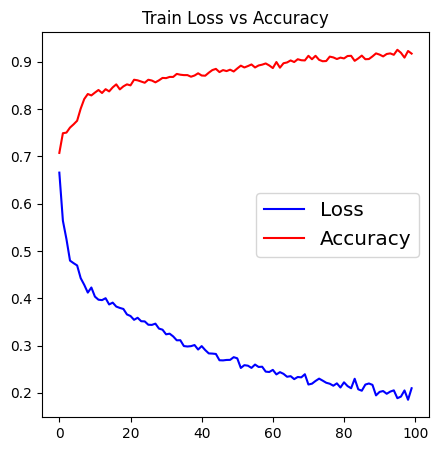

In [12]:
# Plot the training loss and accuracy
fig, bx = plt.subplots(1,1, figsize=(5,5))
bx.plot(history.history['loss'],color='b')
bx.plot(history.history['accuracy'],color='r')
bx.set_title('Train Loss vs Accuracy', fontsize=12)
bx.legend(['Loss', 'Accuracy'], loc='best', fontsize='x-large')

The final score from loss and accuracy

In [13]:
# Evaluate the model
score = model.evaluate(x_test,y_test)

19/19 [==============================] - 0s 2ms/step - loss: 0.3523 - accuracy: 0.8846


Make predictions on the test set

In [14]:
y_prediction = model.predict(x_test)
test_array = np.array(y_test)
unique, counts = np.unique(test_array, return_counts=True)
dict(zip(unique, counts))

19/19 [==============================] - 0s 2ms/step


{0: 449, 1: 140}

# Evaluation of the model

The confusion matrix is a table often used to describe the performance of a classification model on a set of test data for which the true values are known. The confusion matrix shows the number of correct and incorrect predictions made by the model compared to the actual results.
The results are accuracy, precision, recall and F1 score. Accuracy is the proportion of the total number of predictions that were correct. Precision is the proportion of positive predictions that were actually correct. Recall is the proportion of positive predictions that were actually classified correctly. The F1 score is the harmonic mean of precision and recall.

Text(0.5, 36.72222222222221, 'Predict Label')

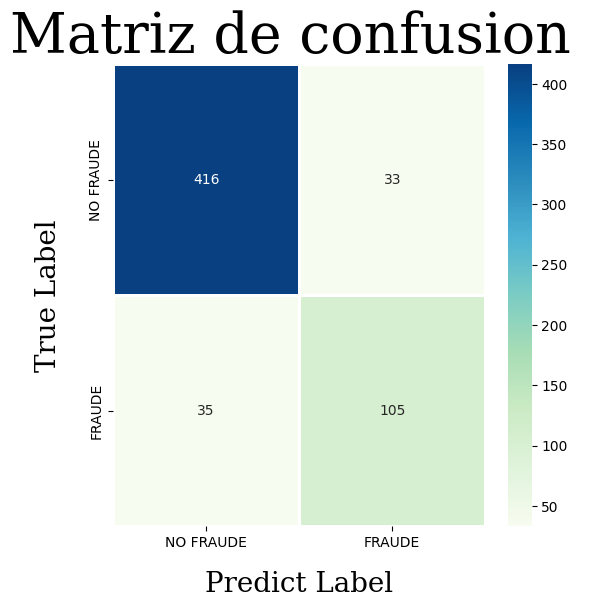

In [15]:
cm = confusion_matrix(test_array,y_prediction.round())
tn, fp, fn, tp = confusion_matrix(test_array,y_prediction.round()).ravel()
result = pd.DataFrame(cm, index=['NO FRAUDE','FRAUDE'],columns=['NO FRAUDE','FRAUDE'])

# Plot the confusion matrix
fig = plt.figure(figsize= (6,6))
ax = fig.add_subplot(1,1,1)
sns.heatmap(result, annot=True, linewidths=1, linecolor= 'white',fmt= 'd', cmap="GnBu")
font= {'family': 'serif',
         'color': 'darkred',
        'weight': 'normal',
        'size':14}
ax.set_title("Matriz de confusion ",fontdict ={'family': 'serif','color': 'black','weight': 'normal','size':40})
ax.set_ylabel("True Label", labelpad=20, fontdict={'family': 'serif','color': 'black','weight': 'normal','size':20})
ax.set_xlabel("Predict Label", labelpad=15, fontdict={'family': 'serif','color': 'black','weight': 'normal','size':20})

In [16]:
precision=tp/(tp+fp)
recall=tp/(tp+fn)
F1 = (2*precision*recall)/(precision+recall)
accuracy=tp/(tp+fn+fp)
print('\n Accuracy:%f \n Precision:%f  \n Recall:%f  \n F1-Score:%f '%(accuracy,precision,recall,F1))



 Accuracy:0.606936 
 Precision:0.760870  
 Recall:0.750000  
 F1-Score:0.755396 


# Verification of the test values

To evaluate the model on the test data, we need to preprocess the data in the same way as we did for the training data. First, we will select the columns used for training the model, and then we will normalize the numerical variables using the standard scaler.

In [17]:
test = test[train.columns]
test = test.drop(['FRAUDE'],axis=1)

cols_to_norm = ['VALOR','INGRESOS','EGRESOS']
test[cols_to_norm] = test[cols_to_norm].apply(lambda x: (x - x.mean()) / (x.std()))
obj = test.select_dtypes(include = "object").columns
label_encoder = preprocessing.LabelEncoder()

for label in obj:
    test[label] = label_encoder.fit_transform(test[label].astype(str))

Make predictions on the test data

In [18]:
test_evaluado = model.predict(test)
# Add the predictions to the test dataframe
test_original['FRAUDE'] = test_evaluado.round()

4/4 [==============================] - 0s 3ms/step


In [21]:
test_original.head()

,id,FRAUDE,VALOR,HORA_AUX,Dist_max_COL,Dist_max_INTER,Canal1,FECHA_FRAUDE,COD_PAIS,CANAL,...,Dist_Mean_INTER,Dist_Max_INTER,NROCIUDADES,Dist_Sum_NAL,Dist_Mean_NAL,Dist_HOY,Dist_sum_NAL,Dist_mean_NAL,Dist_sum_INTER,Dist_mean_INTER
0,98523068,1.0,42230.09,18,1.00,1.00,POS,20150515,US,POS,...,NaN,NaN,1,NaN,NaN,4552.41,1.00,1.00,1.00,1.00
1,300237898,1.0,143202.65,20,614.04,7632.97,POS,20150506,US,MCI,...,6092.69,7632.97,2,1228.07,614.04,4552.41,1228.07,614.04,24370.75,6092.69
2,943273308,1.0,243591.25,2,286.84,2443.14,ATM_INT,20150517,EC,ATM_INT,...,1743.52,2443.14,7,1944.35,138.88,5083.41,1944.35,138.88,6974.09,1743.52
3,951645809,1.0,238267.40,20,1.00,1.00,ATM_INT,20150508,EC,ATM_INT,...,NaN,NaN,1,NaN,NaN,904.81,1.00,1.00,1.00,1.00
4,963797516,1.0,490403.58,13,1.00,1.00,ATM_INT,20150501,US,ATM_INT,...,NaN,NaN,1,NaN,NaN,4552.41,1.00,1.00,1.00,1.00


In [ ]:
# Save the predictions to an Excel file
# test_original.to_excel(base / "output/test_evaluado.xlsx", index = False)